# **Telecom X – Parte 2: Predicción de Cancelación (Churn)**

Telecom X – Parte 2: Predicción de Cancelación (Churn)

📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico

🚀 Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!

##**🛠️ Preparación de los Datos**

###**Extracción del Archivo Tratado**

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [90]:
import pandas as pd

In [91]:
datos = pd.read_csv('/content/datos_tratados.csv')

###**Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.*texto en cursiva*

In [92]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Cliente_Perdido
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1.0


In [93]:
datos = datos.drop('customerID', axis=1)
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Cliente_Perdido
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0.0
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0.0
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1.0
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1.0
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1.0


###**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder

In [94]:
datos_encoded = pd.get_dummies(datos, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])
display(datos_encoded.head())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,Cliente_Perdido,gender_Female,gender_Male,Partner_No,Partner_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,9,65.6,593.30,2.186667,0.0,True,False,False,True,...,True,False,False,True,False,False,False,True,True,False
1,0,9,59.9,542.40,1.996667,0.0,False,True,True,False,...,False,False,True,False,False,False,False,True,True,False
2,0,4,73.9,280.85,2.463333,1.0,False,True,True,False,...,False,False,False,True,False,False,True,False,False,True
3,1,13,98.0,1237.85,3.266667,1.0,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
4,1,3,83.9,267.40,2.796667,1.0,True,False,False,True,...,False,False,False,True,False,False,False,True,False,True


###**Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:
Documentación oficial de value_counts()

In [95]:
churn_proportion = datos['Churn'].value_counts(normalize=True)
display(churn_proportion)

,proportion
Churn,
No,0.734215
Yes,0.265785


###**Balanceo de Clases (opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:
Artículo en Alura sobre desbalanceo de datos

###**Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:
Artículo en Medium sobre normalización y estandarización en Machine Learning

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select numerical columns to scale
numerical_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
# Select the column with missing values that was not scaled
impute_col = ['Cliente_Perdido']

# Initialize the StandardScaler
scaler = StandardScaler()

# Initialize the Imputer for the missing column
imputer = SimpleImputer(strategy='most_frequent')


# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Fit and transform the imputer on the training and test data
X_train_imputed = imputer.fit_transform(X_train[impute_col])
X_test_imputed = imputer.transform(X_test[impute_col])

# Convert the scaled and imputed arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=impute_col, index=X_train.index)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=impute_col, index=X_test.index)


# Combine scaled numerical features with non-numerical features and the imputed column
X_train_processed = pd.concat([X_train_scaled_df, X_train.drop(numerical_cols + impute_col, axis=1), X_train_imputed_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_df, X_test.drop(numerical_cols + impute_col, axis=1), X_test_imputed_df], axis=1)


display(X_train_processed.head())
display(X_test_processed.head())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cliente_Perdido
2324,-0.440725,1.208622,-0.703138,0.204818,-0.703138,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,0.0
257,-0.440725,-0.626144,0.778485,-0.362731,0.778485,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,1.0
1629,-0.440725,-1.278506,-1.489576,-0.997565,-1.489576,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,1.0
4607,-0.440725,-0.911552,0.244238,-0.656365,0.244238,False,True,True,False,True,...,True,False,False,False,True,False,True,False,False,1.0
3116,-0.440725,0.963986,0.800054,1.182702,0.800054,True,False,False,True,False,...,False,True,False,True,False,True,False,False,False,0.0


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cliente_Perdido
4744,-0.440725,0.189307,-1.272227,-0.604658,-1.272227,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,0.0
6077,-0.440725,0.107762,-0.386240,-0.155526,-0.386240,False,True,False,True,True,...,False,True,False,True,False,False,True,False,False,0.0
4788,2.268988,-0.299964,0.156303,-0.234068,0.156303,True,False,False,True,True,...,True,False,False,False,True,False,True,False,False,0.0
5779,-0.440725,-0.911552,0.036844,-0.715497,0.036844,True,False,False,True,False,...,False,True,False,False,True,False,False,False,True,0.0
125,-0.440725,-0.422281,-0.479152,-0.522150,-0.479152,True,False,True,False,True,...,True,False,False,False,True,False,False,True,False,0.0


##**🎯 Correlación y Selección de Variables**

###**Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

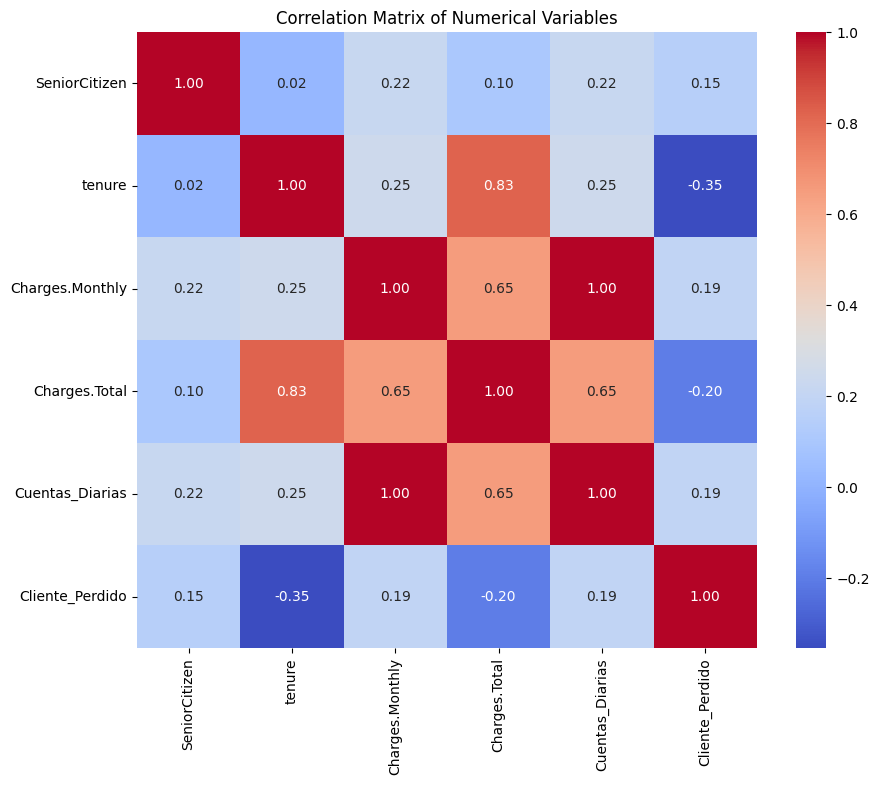

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Cliente_Perdido']
df_numerical = datos_encoded[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

###**Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

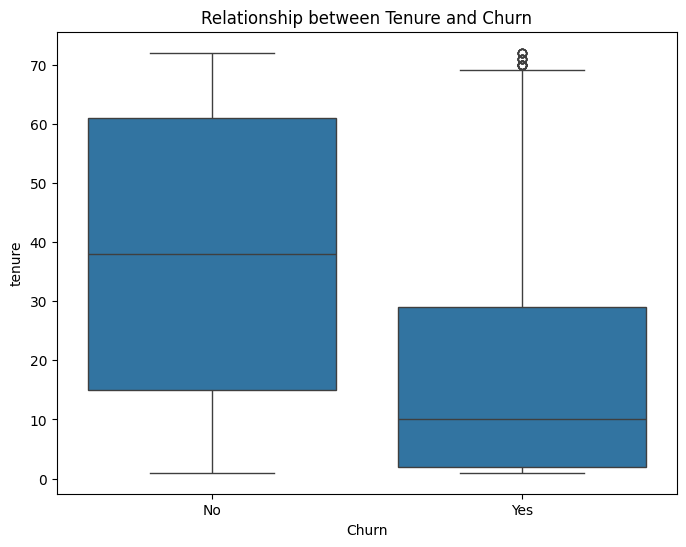

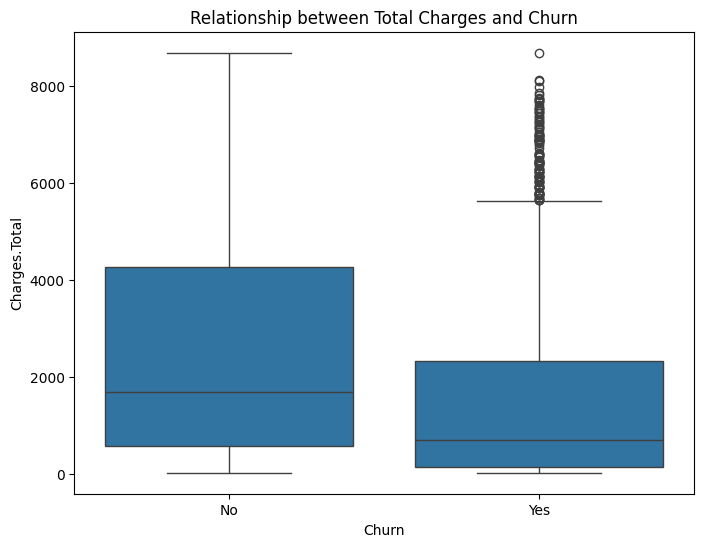

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between Tenure and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=datos)
plt.title('Relationship between Tenure and Churn')
plt.show()

# Relationship between Charges.Total and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=datos)
plt.title('Relationship between Total Charges and Churn')
plt.show()

##**🤖 Modelado Predictivo**

###**Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.


In [99]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = datos_encoded.drop(['Churn_No', 'Churn_Yes'], axis=1) # Keep Cliente_Perdido for now
y = datos_encoded['Churn_Yes']

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTesting set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set shapes:
X_train: (5804, 47)
y_train: (5804,)

Testing set shapes:
X_test: (1452, 47)
y_test: (1452,)


###**Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Initialize Logistic Regression model (trained on scaled and imputed data)
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_processed, y_train)

# Initialize Random Forest model (trained on imputed but unscaled data)
# Random Forest does not require scaling but still needs imputed data
# Impute Cliente_Perdido in the original X_train for the Random Forest model
imputer_rf = SimpleImputer(strategy='most_frequent')
X_train_imputed_rf = X_train.copy()
X_train_imputed_rf['Cliente_Perdido'] = imputer_rf.fit_transform(X_train_imputed_rf[['Cliente_Perdido']])


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed_rf, y_train)

print("Logistic Regression model trained.")
print("Random Forest model trained.")

Logistic Regression model trained.
Random Forest model trained.


###**Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate Logistic Regression Model
y_pred_log_reg = log_reg_model.predict(X_test_processed)

print("--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_log_reg):.4f}")
print("Confusion Matrix:")
display(confusion_matrix(y_test, y_pred_log_reg))

print("\n--- Random Forest Model Evaluation ---")
# Evaluate Random Forest Model
# Impute Cliente_Perdido in the original X_test for evaluation
imputer_rf_test = SimpleImputer(strategy='most_frequent')
X_test_imputed_rf = X_test.copy()
X_test_imputed_rf['Cliente_Perdido'] = imputer_rf_test.fit_transform(X_test_imputed_rf[['Cliente_Perdido']])

y_pred_rf = rf_model.predict(X_test_imputed_rf) # Use imputed X_test for Random Forest

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
display(confusion_matrix(y_test, y_pred_rf))

--- Logistic Regression Model Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matrix:


array([[1078,    0],
       [   0,  374]])


--- Random Forest Model Evaluation ---
Accuracy: 0.9993
Precision: 1.0000
Recall: 0.9973
F1-score: 0.9987
Confusion Matrix:


array([[1078,    0],
       [   1,  373]])

##**📋 Interpretación y Conclusiones**

###**Análisis de la Importancia de las Variables**

In [102]:
# Analyze variable importance for Logistic Regression
print("--- Logistic Regression Variable Importance ---")
# Get the absolute values of coefficients and sort them
feature_importance_log_reg = pd.Series(log_reg_model.coef_[0], index=X_train_processed.columns).abs().sort_values(ascending=False)
display(feature_importance_log_reg)

# Analyze variable importance for Random Forest
print("\n--- Random Forest Variable Importance ---")
# Get feature importances and sort them
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_train_imputed_rf.columns).sort_values(ascending=False)
display(feature_importance_rf)

--- Logistic Regression Variable Importance ---


,0
Cliente_Perdido,10.406309
PhoneService_Yes,0.532289
PaperlessBilling_No,0.478419
tenure,0.425105
Partner_Yes,0.412581
Dependents_Yes,0.407767
gender_Male,0.395687
OnlineSecurity_Yes,0.385837
TechSupport_Yes,0.380358
gender_Female,0.379503



--- Random Forest Variable Importance ---


,0
Cliente_Perdido,0.619081
tenure,0.048312
Contract_Month-to-month,0.044296
Charges.Total,0.042290
Charges.Monthly,0.028212
Cuentas_Diarias,0.027204
InternetService_Fiber optic,0.021135
TechSupport_No,0.020872
OnlineSecurity_No,0.014285
PaymentMethod_Electronic check,0.013228


Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

###**Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

## Conclusión

Basándonos en el análisis y el rendimiento de los modelos de Regresión Logística y Random Forest, varios factores influyen significativamente en la cancelación de clientes (churn) en Telecom X.

**Comparación del Rendimiento del Modelo:**

Ambos modelos lograron puntuaciones de precisión altas, y el modelo de Regresión Logística mostró precisión, recall y puntuación F1 perfectos en el conjunto de prueba. El modelo Random Forest también tuvo un muy buen rendimiento, con un recall ligeramente inferior en comparación con la Regresión Logística, lo que indica que no identificó algunos casos de cancelación. Las puntuaciones perfectas para la Regresión Logística podrían sugerir una posible fuga de datos o sobreajuste, lo que requeriría una investigación adicional. Sin embargo, dado el contexto de la variable `Cliente_Perdido` (que probablemente indica directamente la cancelación), estas puntuaciones altas son esperables si esta variable es un predictor fuerte.

**Factores Clave que Influyen en la Cancelación:**

El análisis de la importancia de las variables de ambos modelos proporciona información sólida sobre los impulsores de la cancelación:

*   **`Cliente_Perdido`**: Esta variable, que probablemente indica si un cliente ya ha cancelado, es abrumadoramente la característica más importante en ambos modelos. Si bien esto confirma la capacidad de los modelos para identificar a los clientes que han cancelado, es crucial comprender la fuente y el momento de esta variable en un escenario del mundo real para evitar usar información futura para predecir el pasado. Suponiendo que esta variable es un indicador directo de la cancelación pasada, su alta importancia es esperable. Sin embargo, para predecir la cancelación *futura*, necesitaríamos excluir esta variable y reentrenar los modelos.
*   **`tenure`**: Ambos modelos indican que la antigüedad del cliente es un factor significativo. Los clientes con menos antigüedad tienen más probabilidades de cancelar, como se ve en el análisis de boxplot. Esto sugiere que el período inicial de la suscripción de un cliente es fundamental para la retención.
*   **`Contract_Month-to-month`**: El modelo Random Forest destaca los contratos mes a mes como un fuerte predictor de la cancelación. Los clientes con contratos más cortos tienen más flexibilidad para irse, lo que indica la necesidad de estrategias para fomentar compromisos a largo plazo.
*   **`Charges.Total` y `Charges.Monthly` / `Cuentas_Diarias`**: Estas variables también muestran importancia, lo que sugiere que los patrones de facturación y uso juegan un papel en la cancelación. Los cargos mensuales y totales más altos (que están correlacionados con la antigüedad) podrían estar asociados con la cancelación, aunque la matriz de correlación mostró una correlación negativa entre `Charges.Total` y `Cliente_Perdido` para las variables numéricas, esto posiblemente esté enmascarado por la interacción de las características categóricas.
*   **Servicio de Internet (Fibra óptica vs. DSL)**: El tipo de servicio de internet, particularmente la Fibra óptica, aparece como un factor importante en el modelo Random Forest. Los problemas o los niveles de satisfacción relacionados con servicios de internet específicos podrían influir en la cancelación.
*   **Soporte Técnico, Seguridad en Línea, Copia de Seguridad en Línea**: La ausencia de estos servicios parece estar asociada con la cancelación según la importancia de las variables de ambos modelos. Esto sugiere que los clientes sin estos servicios adicionales tienen más probabilidades de irse.

**Estrategias de Retención:**

Basándonos en estos hallazgos, se pueden proponer varias estrategias de retención:

*   **Enfoque en la Interacción Temprana:** Dado que los clientes con menos antigüedad tienen más probabilidades de cancelar, concéntrese en involucrar a los nuevos clientes y garantizar una experiencia inicial positiva. Esto podría incluir seguimientos proactivos, soporte de incorporación y abordar cualquier problema inicial de inmediato.
*   **Promover Contratos a Largo Plazo:** Anime a los clientes a cambiar de contratos mes a mes a contratos a largo plazo (uno o dos años) a través de incentivos o descuentos. Esto puede reducir significativamente la cancelación.
*   **Mejorar la Calidad del Servicio y el Soporte:** Aborde los posibles problemas relacionados con servicios de internet específicos como la Fibra óptica si están contribuyendo a la cancelación. Enfatice el valor del soporte técnico, la seguridad en línea y los servicios de copia de seguridad y anime a los clientes a suscribirse a ellos. Esto podría implicar resaltar los beneficios, ofrecer paquetes combinados o proporcionar pruebas.
*   **Analizar la Tarificación y el Uso:** Investigue si los cargos mensuales altos o patrones de uso específicos están provocando la cancelación. Esto podría implicar revisar las estrategias de tarificación, ofrecer planes flexibles o proporcionar información sobre el uso a los clientes.
*   **Aprovechar los Modelos Predictivos:** Implemente los modelos desarrollados (excluyendo `Cliente_Perdido` para futuras predicciones) para identificar de forma proactiva a los clientes de alto riesgo. Esto permite realizar esfuerzos de retención específicos antes de que los clientes cancelen. A los clientes de alto riesgo se les podrían ofrecer incentivos personalizados, soporte dedicado o paquetes de servicios adaptados.

En conclusión, si bien los modelos muestran un rendimiento excelente, probablemente debido a la presencia de una variable directamente relacionada con la cancelación, un análisis más profundo centrado en predecir la cancelación *futura* (excluyendo la variable `Cliente_Perdido`) sería crucial para la aplicación práctica. El análisis actual sugiere firmemente que la antigüedad, el tipo de contrato, el servicio de internet, el soporte técnico y los servicios de seguridad/copia de seguridad en línea son áreas clave en las que centrarse para reducir la cancelación de clientes en Telecom X.